MAX RANGE:
angulo > |    maxRange >
20.0 14.082915284065715



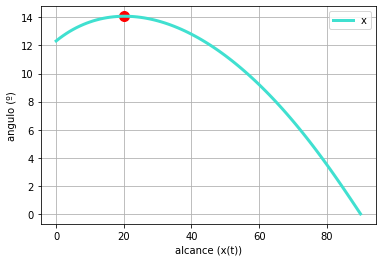

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 5

# Velocidade terminal
vtx = 6.8
vty = 6.8

# Angulo inicial
alpha = 15

# Posição inicial
xx0 = 0
xy0 = 2.5

# Velocidade inicial
v0 = 230 * 1000 / 3600

vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))


# Calcular D para a resistencia do ar
Dx = g / (vtx * np.abs(vtx))
Dy = g / (vty * np.abs(vty))

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)


maxRangeAngle = np.empty(91)
maxRange = np.empty(91)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0

xy[0] = xy0
vy[0] = vy0

p = 0

while (p <= 90):
    alpha = p
    vx0 = v0 * np.cos(np.deg2rad(alpha))
    vy0 = v0 * np.sin(np.deg2rad(alpha))
    vx[0] = vx0
    vy[0] = vy0

    # Preencher os vetores x, v, a
    for i in range(n):
        vTotal = np.sqrt(vx[i] ** 2 + vy[i] ** 2)
            
        ax[i] = - Dx * np.abs(vTotal) * vx[i]
        xx[i + 1] = xx[i] + vx[i] * dt
        vx[i + 1] = vx[i] + ax[i] * dt
        
        ay[i] = - Dy * np.abs(vTotal) * vy[i] - g
        xy[i + 1] = xy[i] + vy[i] * dt
        vy[i + 1] = vy[i] + ay[i] * dt

        if (xy[i] > (0 - dt) and xy[i + 1] < (0 + dt)):
            maxRangeAngle[p] = p
            maxRange[p] = xx[i]
            break

    p += 1


# Encontrar os dados do volante quando ele chega ao solo (x = 0)
for p in range(90):
    if (maxRange[p] == max(maxRange)):
        print("MAX RANGE:")
        print("angulo > |    maxRange >")
        print(maxRangeAngle[p], maxRange[p])
        print("")
        plt.plot(maxRangeAngle[p], maxRange[p], "o", markersize="10", linewidth=5, color="red")
        break


# Plot
plt.plot(maxRangeAngle, maxRange, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("alcance (x(t))")
plt.ylabel("angulo (º)")
plt.legend()         # Legenda só aparece com isto
plt.grid()

